In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
data1 = pd.read_csv('loan_train.csv')
data2 = pd.read_csv('loan_test.csv')

In [99]:
data1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## EDA

In [4]:
import sweetviz
my_report = sweetviz.compare([data1,"Train"],[data2,"Test"],target_feat = 'Loan_Status')

                                             |                                             | [  0%]   00:00 ->…

In [5]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
my_report = sweetviz.analyze([data2,"Test"])

                                             |                                             | [  0%]   00:00 ->…

In [7]:
my_report.show_html('Report_test.html')

Report Report_test.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data1,title = "Data exploration",explorative = True)
profile.to_widgets()
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile = ProfileReport(data2,title = "Data exploration",explorative = True)
profile.to_widgets()
profile.to_file("output1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### Observations

1) Male are more than female 

2) Gender has 2.1% missing values so we can simply mention them as Males as Males are in large amount

3) Number of people who are married are more than unmarried

4) Married has only 0.5% missing values so we can simply mention them as Married

5) Self Employed has around 5% of missing values i.e 32 and 23 missing values in train and test set respectively

6) Loan_Amount column is highly correlated with ApplicantIncome

7) Credit_History is 1 when Loan_Status is 1 otherwise 0 in most of the cases

8) Credit_History plays a major role in deciding the Loan_Status

### Treating missing values

In [100]:
data1['Gender'] = data1['Gender'].fillna('Male')
data2['Gender'] = data2['Gender'].fillna('Male')

In [101]:
data1['Married'] = data1['Married'].fillna('Yes')

In [102]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:
data1.drop('Loan_ID',axis = 1,inplace = True)
data2.drop('Loan_ID',axis = 1,inplace = True)
data1['Gender'] = data1['Gender'].map({'Male':1,'Female':0})
data1['Married'] = data1['Married'].map({'Yes':1,'No':0})
data1['Self_Employed'] = data1['Self_Employed'].map({'Yes':1,'No':0})
data1['Loan_Status'] = data1['Loan_Status'].map({'Y':1,'N':0})
data1['Education'] = data1['Education'].map({'Graduate':1,'Not Graduate':0})
data2['Gender'] = data2['Gender'].map({'Male':1,'Female':0})
data2['Married'] = data2['Married'].map({'Yes':1,'No':0})
data2['Self_Employed'] = data2['Self_Employed'].map({'Yes':1,'No':0})
data2['Education'] = data2['Education'].map({'Graduate':1,'Not Graduate':0})
data1['Dependents'] = data1['Dependents'].str.replace('+','')
data2['Dependents'] = data2['Dependents'].str.replace('+','')

C:\Users\shray\AppData\Local\Temp\ipykernel_20920\3428866053.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['Dependents'] = data1['Dependents'].str.replace('+','')
C:\Users\shray\AppData\Local\Temp\ipykernel_20920\3428866053.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data2['Dependents'] = data2['Dependents'].str.replace('+','')


In [104]:
data1['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [105]:
cols = ['Married','Dependents']
X = data1[cols]
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
X = impute_it.fit_transform(X)

for i in range(len(X)):
    if X[i][1]<0.5:
        X[i][1] = 0
    elif X[i][1]>=0.5 and X[i][1]<1.5:
        X[i][1] = 1
    elif X[i][1]>=1.5 and X[i][1]<2.5:
        X[i][1] = 2
    else:
        X[i][1] = 3
X = pd.DataFrame(X,columns = cols)        
data1['Dependents'] = X['Dependents']

In [106]:
X = data2[cols]
X = impute_it.fit_transform(X)
for i in range(len(X)):
    if X[i][1]<0.5:
        X[i][1] = 0
    elif X[i][1]>=0.5 and X[i][1]<1.5:
        X[i][1] = 1
    elif X[i][1]>=1.5 and X[i][1]<2.5:
        X[i][1] = 2
    else:
        X[i][1] = 3
X = pd.DataFrame(X,columns = cols)        
data2['Dependents'] = X['Dependents']

In [107]:
data1.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
data1['Self_Employed'] = data1['Self_Employed'].fillna(0)
data2['Self_Employed'] = data2['Self_Employed'].fillna(0)

In [109]:
##Lets find missing values in LoanAmount column with the help of ApplicantIncome and CoapplicantIncome columns by making use of IteraticeImputer
import math
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
X = data1[cols]
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
X = impute_it.fit_transform(X)
for i in range(len(X)):
    X[i][2] = math.floor(X[i][2])

X = pd.DataFrame(X,columns = cols)
data1['LoanAmount'] = X['LoanAmount']

In [110]:
## our missing values in LoanAmount are handled, let's do the same with test
X = data2[cols]
X = impute_it.fit_transform(X)
X = impute_it.fit_transform(X)
for i in range(len(X)):
    X[i][2] = math.floor(X[i][2])

X = pd.DataFrame(X,columns = cols)
data2['LoanAmount'] = X['LoanAmount']

In [111]:
data1['Loan_Amount_Term'] = data1['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].mode()[0])
data2['Loan_Amount_Term'] = data2['Loan_Amount_Term'].fillna(data2['Loan_Amount_Term'].mode()[0])

In [112]:
data1.loc[(data1.Credit_History.isnull())&(data1.Loan_Status==1),'Credit_History'] = 1
data1.loc[(data1.Credit_History.isnull()),'Credit_History'] = 0

In [113]:
data2['Credit_History'].fillna(data2['Credit_History'].value_counts().index[0], inplace=True)

In [114]:
data2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [115]:
data1["Property_Area"] = data1["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})
data2["Property_Area"] = data2["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

In [116]:
data1['TotalIncome'] = data1['ApplicantIncome']+data1['CoapplicantIncome']
data2['TotalIncome'] = data2['ApplicantIncome']+data2['CoapplicantIncome']
data1.drop(['ApplicantIncome','CoapplicantIncome'],inplace = True,axis =1)
data2.drop(['ApplicantIncome','CoapplicantIncome'],inplace = True,axis =1)

-------------Null vaues are handled and some sort of feature engineering is also done------------

### Transformations on graph

In [117]:
##Q-Q plot
import scipy.stats as stat
import pylab
def plot_data(df,feature):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist = "norm",plot = pylab)
    plt.show()

In [118]:
import numpy as np

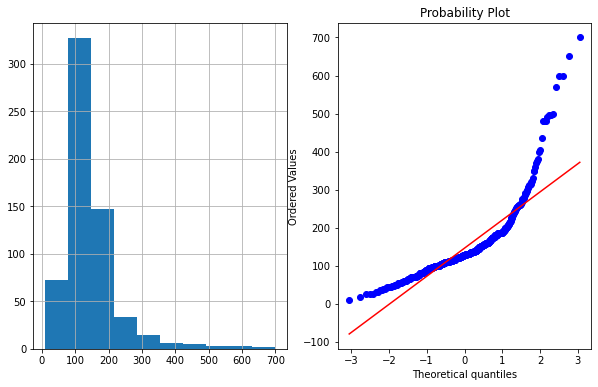

In [119]:
plot_data(data1,'LoanAmount')

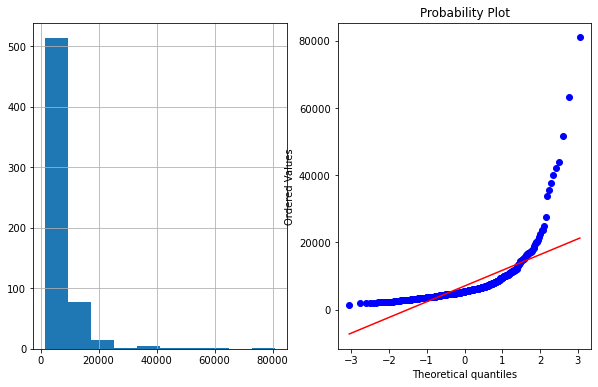

In [120]:
plot_data(data1,'TotalIncome')

In [121]:
data1['TotalIncome'],parameters = stat.boxcox(data1['TotalIncome'])

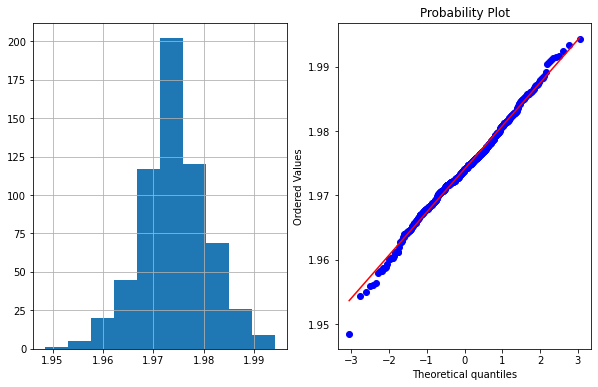

In [122]:
plot_data(data1,'TotalIncome')

In [123]:
data1['LoanAmount'],parameters = stat.boxcox(data1['LoanAmount'])

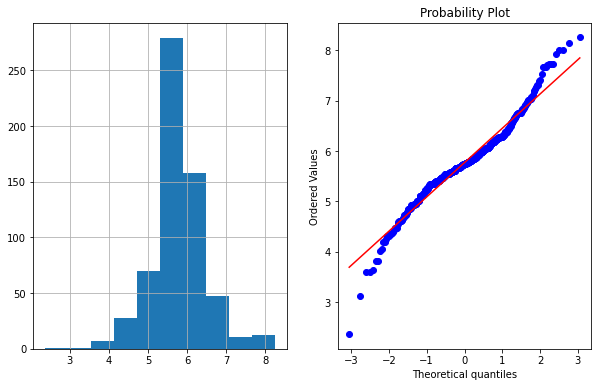

In [124]:
plot_data(data1,'LoanAmount')

In [125]:
data1['Loan_Amount_Term'] = data1['Loan_Amount_Term']/data1['Loan_Amount_Term'].max()

In [126]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0.0,1,0.0,5.854141,0.75,1.0,2,1,1.975060
1,1,1,1.0,1,0.0,5.749213,0.75,1.0,0,0,1.975586
2,1,1,0.0,1,1.0,4.848104,0.75,1.0,2,1,1.964668
3,1,1,0.0,0,0.0,5.659617,0.75,1.0,2,1,1.972752
4,1,0,0.0,1,0.0,5.884239,0.75,1.0,2,1,1.975392


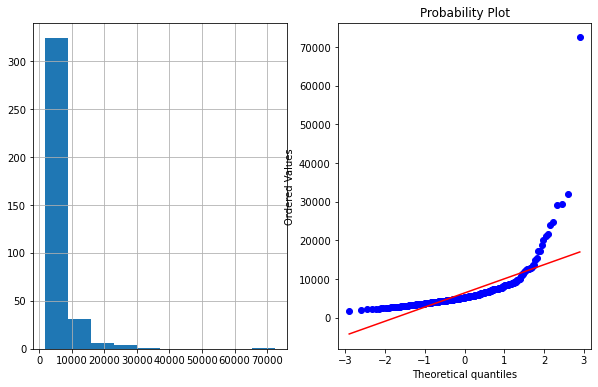

In [127]:
plot_data(data2,'TotalIncome')

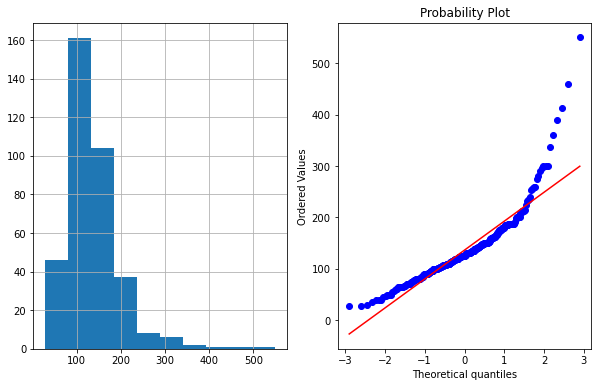

In [128]:
plot_data(data2,'LoanAmount')

In [129]:
data2['TotalIncome'],parameters = stat.boxcox(data2['TotalIncome'])
data2['LoanAmount'],parameters = stat.boxcox(data2['LoanAmount'])

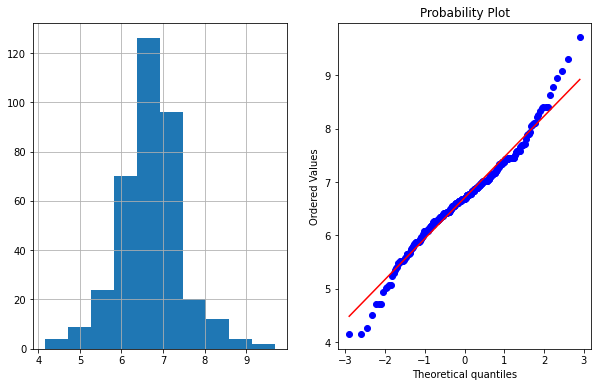

In [130]:
plot_data(data2,'LoanAmount')

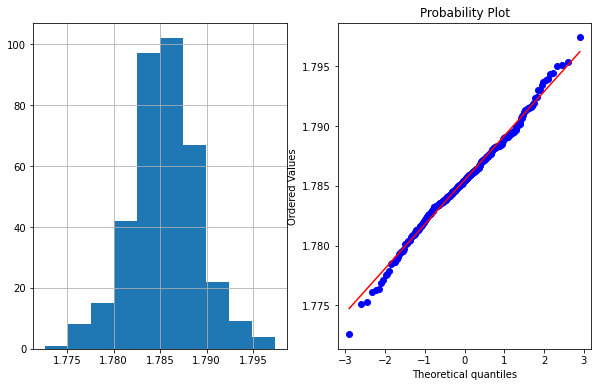

In [131]:
plot_data(data2,'TotalIncome')

In [132]:
data2['Loan_Amount_Term'] = data2['Loan_Amount_Term']/data2['Loan_Amount_Term'].max()

In [133]:
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,1,0.0,1,0.0,6.445091,0.75,1.0,2,1.786246
1,1,1,1.0,1,0.0,6.695016,0.75,1.0,2,1.784298
2,1,1,2.0,1,0.0,7.656032,0.75,1.0,2,1.787598
3,1,1,2.0,1,0.0,6.272259,0.75,1.0,2,1.784896
4,1,0,0.0,0,0.0,5.831492,0.75,1.0,2,1.780891


In [44]:
my_report = sweetviz.analyze([data1,"Train"],target_feat = 'Loan_Status')

                                             |                                             | [  0%]   00:00 ->…

In [45]:
my_report.show_html('analysis_after_transformation.html')

Report analysis_after_transformation.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Model Training

In [134]:
data1

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0.0,1,0.0,5.854141,0.750,1.0,2,1,1.975060
1,1,1,1.0,1,0.0,5.749213,0.750,1.0,0,0,1.975586
2,1,1,0.0,1,1.0,4.848104,0.750,1.0,2,1,1.964668
3,1,1,0.0,0,0.0,5.659617,0.750,1.0,2,1,1.972752
4,1,0,0.0,1,0.0,5.884239,0.750,1.0,2,1,1.975392
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1,0.0,4.945468,0.750,1.0,0,1,1.964042
610,1,1,3.0,1,0.0,4.193304,0.375,1.0,0,1,1.969985
611,1,1,1.0,1,0.0,6.719526,0.750,1.0,2,1,1.979286
612,1,1,2.0,1,0.0,6.283495,0.750,1.0,2,1,1.978253


In [38]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [39]:
X = data1.drop('Loan_Status',axis = 1)
y = data1['Loan_Status']

##### Logistic Regression

In [40]:
params = {
    'C':stat.loguniform(1e-5,100),
    'solver' :['newton-cg', 'lbfgs', 'liblinear'],
    'penalty':['none', 'l1', 'l2', 'elasticnet']
}

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [42]:
random_search1 = RandomizedSearchCV(lr,param_distributions=params,n_iter = 5,scoring = 'accuracy',n_jobs = -1,cv = 5,verbose = 3)

In [43]:
random_search1.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\shray\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shray\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shray\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\shray\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueE

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002810477DA60>,
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy', verbose=3)

In [44]:
random_search1.best_params_

{'C': 0.2935506478688814, 'penalty': 'l1', 'solver': 'liblinear'}

In [45]:
model1 = random_search1.best_estimator_

In [46]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model1,X,y,cv = 10)

In [47]:
score.mean()

0.8306980433632999

##### SVC

In [56]:
from sklearn.svm import SVC

In [57]:
svc = SVC(probability = True)

In [58]:
params = {"C": stat.uniform(2, 10),
             "gamma": stat.uniform(0.1, 1),
          "kernel":['poly','rbf','sigmoid']
         }

In [59]:
random_search2 = RandomizedSearchCV(svc,param_distributions=params,n_iter = 5,scoring = 'accuracy',n_jobs = -1,cv = 5,verbose = 3)

In [ ]:
random_search2.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
random_search2.best_params_

In [ ]:
model2 = random_search2.best_estimator_

In [ ]:
score = cross_val_score(model2,X,y,cv = 10)

In [ ]:
score.mean()

##### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [ ]:
params = {
    'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4,6,8,10],
 'min_samples_split': [2, 5,7,9, 10],
 'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 100, num = 50)]}

In [ ]:
random_search3 = RandomizedSearchCV(rf,param_distributions=params,n_iter = 5,scoring = 'accuracy',n_jobs = -1,cv = 5,verbose = 3)

In [ ]:
random_search3.fit(X,y)

In [ ]:
random_search3.best_params_

In [ ]:
model3 = random_search3.best_estimator_

In [ ]:
score = cross_val_score(model3,X,y,cv = 10)

In [ ]:
score.mean()

##### XgBoost

In [ ]:
import xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
params = {
        'min_child_weight': [1,2,3,4,5,6,7,8,9,10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9,1.0],
        'colsample_bytree': [0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8,0.9, 1.0],
        'max_depth': [1,2,3, 4, 5,6,7,8,9,10]
        }

In [ ]:
random_search4 = RandomizedSearchCV(xgb,param_distributions=params,n_iter = 5,scoring = 'accuracy',n_jobs = -1,cv = 5,verbose = 3)

In [ ]:
random_search4.fit(X,y)

In [ ]:
random_search4.best_params_

In [ ]:
model4 = random_search4.best_estimator_

In [ ]:
score = cross_val_score(model4,X,y,cv = 10)

In [ ]:
score.mean()

##### Main Model

In [48]:
main_model = model1

In [49]:
main_model.fit(X,y)

LogisticRegression(C=0.2935506478688814, penalty='l1', solver='liblinear')

###### Pickle main model

In [50]:
import pickle
pickle_out = open("loan_prediction.pkl","wb")
pickle.dump(main_model,pickle_out)
pickle_out.close()

In [96]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5720.0,0.0,110.0
1,3076.0,1500.0,126.0
2,5000.0,1800.0,208.0
3,2340.0,2546.0,100.0
4,3276.0,0.0,78.0
...,...,...,...
362,4009.0,1777.0,113.0
363,4158.0,709.0,115.0
364,3250.0,1993.0,126.0
365,5000.0,2393.0,158.0


In [52]:
X = np.array(["LP001003","Male","Yes","1","Graduate","No",5098,1208,128,360,1,"Rural"]).reshape(1,-1)

In [53]:
X

array([['LP001003', 'Male', 'Yes', '1', 'Graduate', 'No', '5098', '1208',
        '128', '360', '1', 'Rural']], dtype='<U11')

In [54]:
main_model.predict(np.array(["LP001003","Male","Yes","1","Graduate","No",5098,1208,128,360,1,"Rural"]).reshape(1,-1))

C:\Users\shray\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\shray\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [58]:
res = "64+"
res = res.replace('+','')
res

'64'